In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plt_conf as conf 

import rutinas as ru
import pandas as pd
import scipy


from scipy.linalg import solve, norm, eig, eigh
from scipy.optimize import curve_fit, root_scalar
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp, quad

import plt_conf as conf

In [2]:
conf.general()  # cargando configuración general

### Tabla de integrales

In [3]:
# terminos

In [3]:
def menor(dat): 
    dif = []
    ii = 0
    for i in dat:
        dif.append([ii, abs(0-i)])
        ii += 1
    
    dif = np.array(dif)
    
    temp0 = np.copy(dif)
    temp = []
    while True:
        menor = min(temp0[:, 1])
        ind = list(np.where(temp0[:, 1] == menor)[0])
        for i in ind:
            temp.append(list(temp0[i]))
        
        temp0 = np.delete(temp0, ind, axis=0) # eliminandolos
        
        if len(temp0)==0:
            break
    
    temp = np.array(temp)
    ind = temp[:, 0]
    return ind

## Runge Kutta

In [4]:
def sys_firtsOrd(r, V, arg):
    """
    """
    
    ell, lam, fsig, fpot, = arg
    h, x1, b, x3, a, x2 = V
    
    
    dh = x1
    dx1 = 2*fsig(r)*a
    db = x3
    dx3 = -1j*lam*a-(fpot(r)-ell*(ell+1)/r**2)
    da = x2
    dx2 = -1j*lam*b+fsig(r)*h-(fpot(r)-ell*(ell+1)/r**2)
    
    return [dh, dx1, db, dx3, da, dx2]

def sys_firtsOrd2(r, V, arg):
    """
    """
    
    ell, lam, fsig, fpot, = arg
    H, x1, B, x3, A, x2 = V
    
    
    dH = x1
    dx1 = 2*r**ell*A*fsig(r)-2*x1/r
    dB = x3
    dx3 = (0-1j)*lam*A-B*fpot(r)-2*(ell+1)*x3/r
    dA = x2
    dx2 = (0-1j)*lam*B-A*fpot(r)+H*fsig(r)/r**ell-2*(ell+1)*x2/r
    
    return [dH, dx1, dB, dx3, dA, dx2]

In [5]:
# Resolución de ecuaciones del fondo
nodos, ell = 1, 1 #1,1

en, lam, nv, rD, sD, dsD, uD, duD, cer0, ell = ru.profiles(nodos, ell)  # no escalada

# extendiendo soluciones
Ext = 7000
Np = 4800

rDnew, sDnew, dsDnew, uDnew, duDnew = ru.extend(ell, rD, sD, dsD, uD, duD, Ext, Np)

# normalizando

# reescalando
xN = rDnew/lam
sN = (rDnew**ell*sDnew)*lam**2
dsN = rDnew**(ell-1)*(ell*sDnew+rDnew*dsDnew)*lam**3
uN = uDnew*lam**2
duN = duDnew*lam**3

# interpolación de los datos
fsN = interp1d(xN, sN, kind='quadratic') # quadratic
fdsN = interp1d(xN, dsN, kind='linear')
fuN = interp1d(xN, uN, kind='quadratic')
fduN = interp1d(xN, duN, kind='quadratic')

# checking
Nf = lambda x: x**2*fsN(x)**2/(2*ell+1)
Nv = quad(Nf, xN[0], xN[-1])[0]

Bv = quad(Nf, xN[0], xN[-1])[0]
enA = 2*uN[-1]
print(r'Checking normalización,', Nv, 1)
print(r'Checking convergencia de la Energía U(inf), U(asint)', enA, en)

Finding a profile with  1 nodes
Maxima precisión alcanzada 0.33783151192188826 radio 32.99436221518425
masa  -10.714976632789813 Uf  -0.3247517428252849

E(U(inf))  -0.053727409224277295
energía =  -0.1583693272407303 $\lambda = $ 0.27998193449879394

Checking normalización,  1.0000000000706648 1
checking  -1.0101388079394344 10.714977040823765 0.296461078084562 -0.1583693272407303
Checking normalización, 1.0000000006371232 1
Checking convergencia de la Energía U(inf), U(asint) -0.15813046858103658 -0.1583693272407303


In [6]:
# calculando autovalores y autovectores por método espectral
#L = 150 # 200
#N = 100 # 120
L = 200*(nodos+1)
N = int(L*3/4)
lEnigF1, _, VF1, x1 = ru.espectro(L, N, fsN, fuN, ell) # , V1

# creando dataframe
jj = np.real(lEnigF1)!=0
autovec = VF1[:, jj]
autoval = lEnigF1[jj]

print(autoval)

Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  Tr

In [7]:
indic = [0, 1, 2, 3]  #[0, 1, 4, 5]  # [0, 1, 2, 3] 
datAVec = []
lisAVal = []
lisautoval = []
for ii in indic:
    Es0 = autovec[:, ii]
    A0, B0 = Es0[:(N-1)], Es0[(N-1):]
    A0 = np.insert(A0, [0, len(A0)], [0, 0], axis=None)
    B0 = np.insert(B0, [0, len(B0)], [0, 0], axis=None)
    datAVec.append(A0)
    datAVec.append(B0)
    
    lisAVal.append('{0.real:7.5f} + {0.imag:7.5f}i'.format(autoval[ii]))
    lisautoval.append(autoval[ii])

datAVec = np.array(datAVec).T

DatosVect = pd.DataFrame(datAVec, index=pd.Index(x1, name='Chev. ptos.'),
            columns=pd.MultiIndex.from_product([lisAVal,
                                                ['A', 'B']], names=['Autovalor:', 'Autovector:']))
DatosVect

# Asignando auto-vectores
def conv(elem):
    """ 
    """
    idx = pd.IndexSlice
    A = np.array(elem.loc[:, idx[:,'A']]).T[0]
    B = np.array(elem.loc[:,idx[:,'B']]).T[0]
    return A, B

# separando
nLam = 4 # 2
datos = [DatosVect[[lisAVal[i]]] for i in range(nLam)]
[A1, B1], [A2, B2], [A3, B3], [A4, B4] = np.array(list(map(conv, datos)))
#[A1, B1], [A2, B2] = np.array(list(map(conv, datos)))


# pasando a distancias reales
rad = np.array([(-x1[i]+1)*L/2. for i in range(N+1)])

#datos

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3798305679.py:1: RuntimeWarning: invalid value encountered in divide
  datA = [A1/rad, A2/rad, A3/rad, A4/rad]
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3798305679.py:2: RuntimeWarning: invalid value encountered in divide
  datB = [B1/rad, B2/rad, B3/rad, B4/rad]
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3798305679.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3798305679.py:46: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3798305679.py:64: UserWarning: cmr10 font should ideally be u

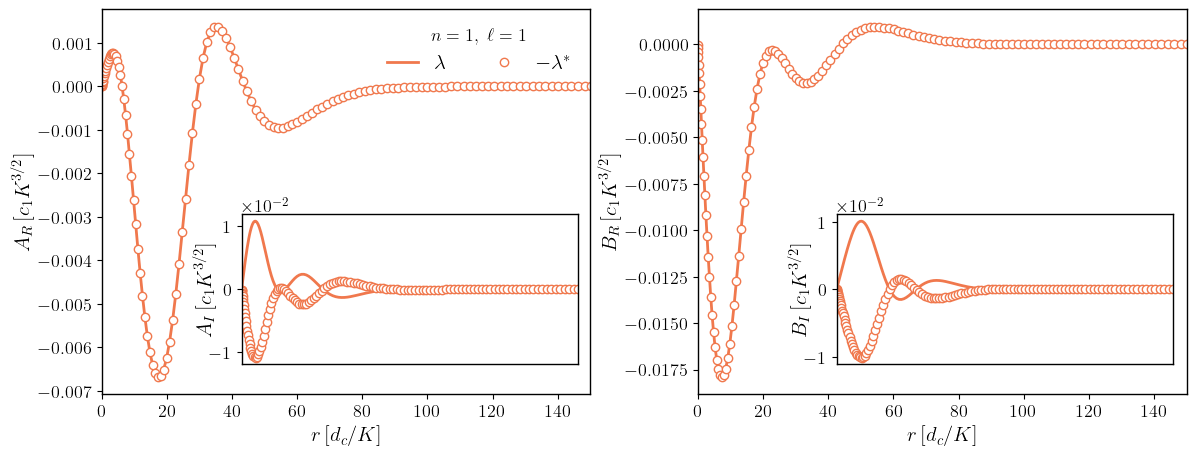

In [8]:
datA = [A1/rad, A2/rad, A3/rad, A4/rad]
datB = [B1/rad, B2/rad, B3/rad, B4/rad]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0., wspace=.22) # espacio vertical y horizontal entre los subplots
                      ) 

ax[0].plot(rad, np.real(datA[2]), '-', color = '#f0784d',
               label = r'$\lambda$')  

#print('{0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[2]))

ax[0].plot(rad, np.real(datA[1]), ' ', marker='o', color = '#f0784d', mfc='white',
               label = r'$-\lambda^*$') # = {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[1])


    
ax[1].plot(rad, np.real(datB[2]), '-', color = '#f0784d',
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[2]))
ax[1].plot(rad, np.real(datB[1]), ' ', marker='o', color = '#f0784d', mfc='white',
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[1]))
    
    
ax[0].set_xlabel(r'$r\,[d_c/K]$')
ax[0].set_ylabel(r'$A_R \, [c_1 K^{3/2}]$')
ax[1].set_xlabel(r'$r\,[d_c/K]$')
ax[1].set_ylabel(r'$B_R \, [c_1 K^{3/2}]$')

ax[0].set_xlim(0, 150)
ax[1].set_xlim(0, 150)
#ax[0].set_ylim([-0.00003, 0.0009])
#ax[1].set_ylim([-0.00006, 0.00005])
#ax[1].axhline(y=0,color='black',ls='--',lw=1)

ax[0].legend(loc='best', frameon=False, ncols=2, title=r'$n=1, \; \ell=1$')
#ax[1].legend(loc='best', frameon=False)

#ax[0].text(x=20,y=0.0028, s=r'$\ell=1$')
#ax[0].text(x=20,y=0.0022, s=r'one-node')
#ax[1].text(x=-0.037,y=0.003, s=r'one-node')


# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.225, 0.17, 0.24, 0.3]  # posición y dimensiones del insert
ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax1.ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))

ax1.plot(rad, np.imag(datA[2]), '-', color = '#f0784d',
               label = r'  $\lambda= {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[2]))
ax1.plot(rad[::1], np.imag(datA[1][::1]), ' ', marker='o', color = '#f0784d', mfc='white',
               label = r'$\lambda= {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[1]))

# límites
ax1.set_xlim(0, 150)
#ax1.set_ylim(0, 1)
ax1.set_ylabel(r'$A_I \, [c_1 K^{3/2}]$', labelpad=-5)
ax1.set_xticks([]);


# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.65, 0.17, 0.24, 0.3]  # posición y dimensiones del insert
ax2 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))

ax2.plot(rad, np.imag(datB[2]), '-', color = '#f0784d',
               label = r'$\lambda= {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[2]))
ax2.plot(rad[::1], np.imag(datB[1][::1]), ' ', marker='o', color = '#f0784d', mfc='white',
               label = r'$\lambda= {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[1]))

# límites
ax2.set_xlim(0, 150)
#ax1.set_ylim(0, 1)
ax2.set_ylabel(r'$B_I \, [c_1 K^{3/2}]$', labelpad=-5)
ax2.set_xticks([]);

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/2706536982.py:1: RuntimeWarning: invalid value encountered in divide
  datA = [A1/rad, A2/rad, A3/rad, A4/rad]
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/2706536982.py:2: RuntimeWarning: invalid value encountered in divide
  datB = [B1/rad, B2/rad, B3/rad, B4/rad]
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/2706536982.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/2706536982.py:46: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/2706536982.py:64: UserWarning: cmr10 font should ideally be u

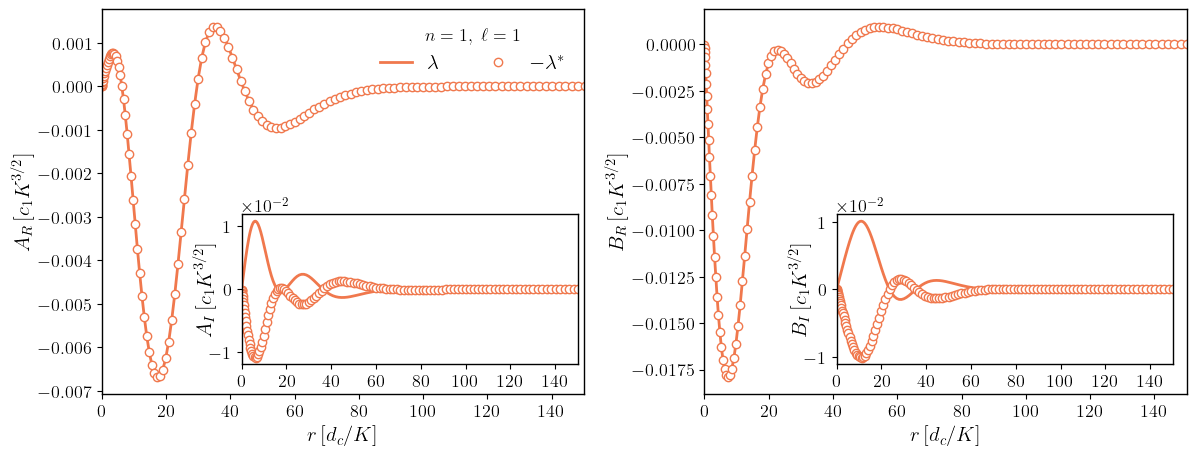

In [13]:
datA = [A1/rad, A2/rad, A3/rad, A4/rad]
datB = [B1/rad, B2/rad, B3/rad, B4/rad]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0., wspace=.25) # espacio vertical y horizontal entre los subplots
                      ) 

ax[0].plot(rad, np.real(datA[2]), '-', color = '#f0784d',
               label = r'$\lambda$')  

#print('{0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[2]))

ax[0].plot(rad, np.real(datA[1]), ' ', marker='o', color = '#f0784d', mfc='white',
               label = r'$-\lambda^*$') # = {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[1])


    
ax[1].plot(rad, np.real(datB[2]), '-', color = '#f0784d',
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[2]))
ax[1].plot(rad, np.real(datB[1]), ' ', marker='o', color = '#f0784d', mfc='white',
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lisautoval[1]))
    
    
ax[0].set_xlabel(r'$r\,[d_c/K]$')
ax[0].set_ylabel(r'$A_R \, [c_1 K^{3/2}]$')
ax[1].set_xlabel(r'$r\,[d_c/K]$')
ax[1].set_ylabel(r'$B_R \, [c_1 K^{3/2}]$')

ax[0].set_xlim(0, 150)
ax[1].set_xlim(0, 150)
#ax[0].set_ylim([-0.00003, 0.0009])
#ax[1].set_ylim([-0.00006, 0.00005])
#ax[1].axhline(y=0,color='black',ls='--',lw=1)

ax[0].legend(loc='best', frameon=False, ncols=2, title=r'$n=1, \; \ell=1$')
#ax[1].legend(loc='best', frameon=False)

#ax[0].text(x=20,y=0.0028, s=r'$\ell=1$')
#ax[0].text(x=20,y=0.0022, s=r'one-node')
#ax[1].text(x=-0.037,y=0.003, s=r'one-node')


# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.225, 0.17, 0.24, 0.3]  # posición y dimensiones del insert
ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax1.ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))

ax1.plot(rad, np.imag(datA[2]), '-', color = '#f0784d',
               label = r'  $\lambda= {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[2]))
ax1.plot(rad[::1], np.imag(datA[1][::1]), ' ', marker='o', color = '#f0784d', mfc='white',
               label = r'$\lambda= {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[1]))

# límites
ax1.set_xlim(0, 150)
#ax1.set_ylim(0, 1)
ax1.set_ylabel(r'$A_I \, [c_1 K^{3/2}]$', labelpad=-5)
ax1.set_xticks([0, 20, 40, 60, 80, 100, 120, 140]);


# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.65, 0.17, 0.24, 0.3]  # posición y dimensiones del insert
ax2 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))

ax2.plot(rad, np.imag(datB[2]), '-', color = '#f0784d',
               label = r'$\lambda= {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[2]))
ax2.plot(rad[::1], np.imag(datB[1][::1]), ' ', marker='o', color = '#f0784d', mfc='white',
               label = r'$\lambda= {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[1]))

# límites
ax2.set_xlim(0, 150)
#ax1.set_ylim(0, 1)
ax2.set_ylabel(r'$B_I \, [c_1 K^{3/2}]$', labelpad=-5)
ax2.set_xticks([0, 20, 40, 60, 80, 100, 120, 140]);

In [14]:
fig.savefig('funEng.eps', format='eps', #metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [15]:
i = 2
print(autoval[i])

# calculando h
D_chev, x_chev = ru.cheb(N)

x_cod = np.array([(-x_chev[i]+1)*L/2. for i in range(N+1)])

D2_chev = np.dot(D_chev, D_chev)/((L/2)**2)
D2i_chev = np.copy(D2_chev[1:N, 1:N])
x_cod2 = np.copy(x_cod[1:N])
R0_chev = np.diag(fsN(x_cod2))
    

invD2i_chev = np.linalg.inv(D2i_chev)

datosA = datA[i][1:N]*rad[1:N]

dath = 2*np.dot(invD2i_chev, np.dot(R0_chev, datosA))

(0.006193981378628134+0.03340185626074508j)


/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3922026347.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(x_cod2, np.real(dath)/x_cod2)


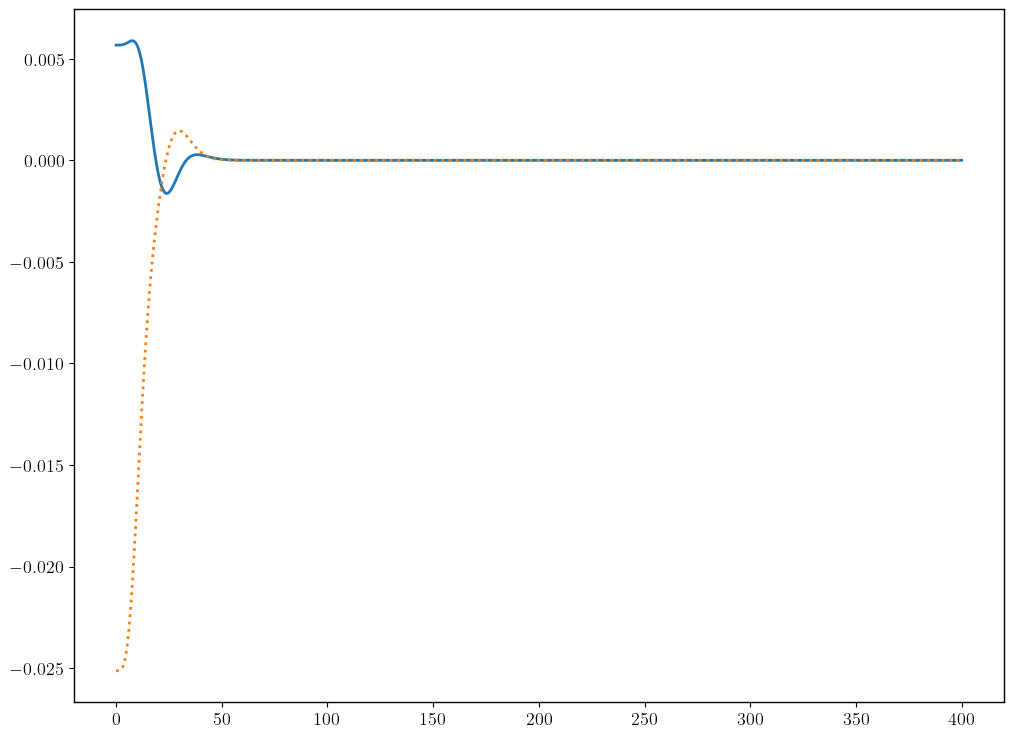

In [16]:
plt.plot(x_cod2, np.real(dath)/x_cod2)
plt.plot(x_cod2, np.imag(dath)/x_cod2, ':')

In [15]:
# resolviendo con RK

In [11]:
lisautoval, i

([(-0.006193981378647266-0.03340185626074365j),
  (-0.006193981378628133+0.03340185626074508j),
  (0.006193981378628134+0.03340185626074508j),
  (0.006193981378647266-0.03340185626074365j)],
 2)

In [12]:
U0

[(0.00567160827694298-0.02513338204306185j),
 (3.256526643292838e-11+2.2789556445229557e-10j),
 (-0.003939599520910939+0.0012774971620460086j),
 (1.8533486587236999e-06-3.763317554820289e-08j),
 (0.0003456370253456721+0.002856247601314609j),
 (-5.961387295023979e-07-1.8812213448156925e-06j)]

In [17]:
lam = lisautoval[i]
Av = datA[i][1]/(rad[1]**ell) # rad[1]**(ell+1)
dAv = (np.diff(datA[i]/(rad**ell))/np.diff(rad))[1]
Bv = datB[i][1]/(rad[1]**ell) # rad[1]**(ell+1)
dBv = (np.diff(datB[i]/(rad**ell))/np.diff(rad))[1]
Hv = dath[0]/x_cod2[0]
dHv = (np.diff(dath/x_cod2)/np.diff(x_cod2))[0]

# resolviendo
rmin, rmax = x_cod2[0], 200
arg = [ell, lam, fsN, fuN]

rspan = np.linspace(rmin, rmax, 1000)

# H, x1, B, x3, A, x2 
U0 = [Hv, dHv, Bv, dBv, Av, dAv] # 0+0j [Hv, dHv, Bv, dBv, Av, dAv]

sol_ = solve_ivp(sys_firtsOrd2, [rmin, rmax], U0, args=([arg]), t_eval=rspan,
                 method='RK45', rtol=1e-11, atol=1e-12)
        

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3859864242.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True, sharey=False, figsize=(10,15),


(-0.06, 0.05)

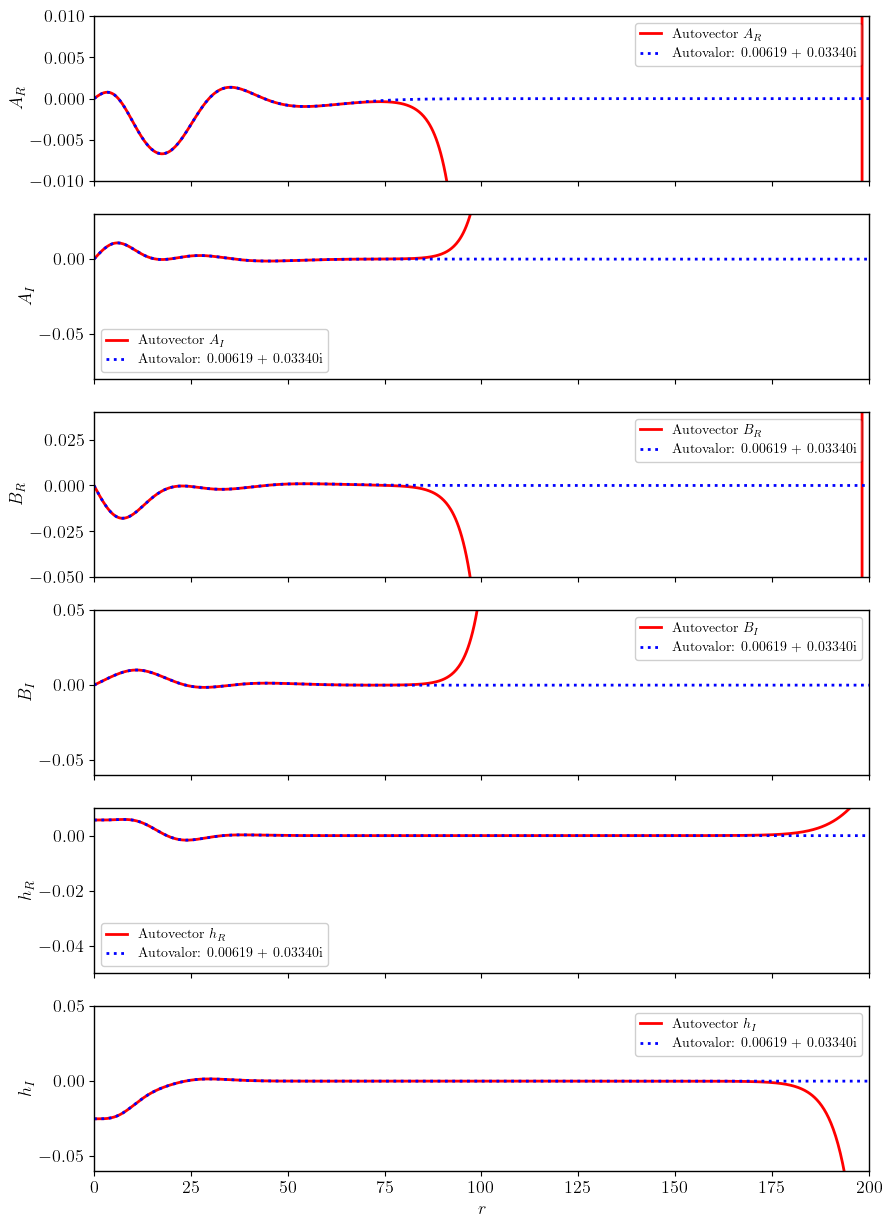

In [18]:
fig, ax = plt.subplots(nrows=6, ncols=1, sharex=True, sharey=False, figsize=(10,15),
                       gridspec_kw={'wspace':0.07, 'hspace':0.2})

ax[0].plot(sol_.t, np.real(sol_.y[4])*sol_.t**(ell), '-', color = 'red',
               label = r'Autovector $A_R$')
ax[0].plot(rad, np.real(datA[i]), ':', color = 'blue',
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lam))

ax[1].plot(sol_.t, np.imag(sol_.y[4])*sol_.t**(ell), '-', color = 'red',
               label = r'Autovector $A_I$')
ax[1].plot(rad, np.imag(datA[i]), ':', color = 'blue',
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lam))

ax[2].plot(sol_.t, np.real(sol_.y[2])*sol_.t**(ell), '-', color = 'red',
               label = r'Autovector $B_R$')
ax[2].plot(rad, np.real(datB[i]), ':', color = 'blue',
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lam))

ax[3].plot(sol_.t, np.imag(sol_.y[2])*sol_.t**(ell), '-', color = 'red',
               label = r'Autovector $B_I$')
ax[3].plot(rad, np.imag(datB[i]), ':', color = 'blue',
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lam))

ax[4].plot(sol_.t, np.real(np.real(sol_.y[0])), '-', color = 'red', 
               label = r'Autovector $h_R$')
ax[4].plot(x_cod2, np.real(dath)/x_cod2, ':', color = 'blue',
                label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lam))

ax[5].plot(sol_.t, np.real(np.imag(sol_.y[0])), '-', color = 'red',
               label = r'Autovector $h_I$')
ax[5].plot(x_cod2, np.imag(dath)/x_cod2, ':', color = 'blue',
                label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lam))

    
#ax[0].set_xlabel(r'$r$', fontsize=13)
ax[0].set_ylabel(r'$A_R$', fontsize=13)
ax[1].set_ylabel(r'$A_I$', fontsize=13)
ax[2].set_ylabel(r'$B_R$', fontsize=13)
ax[3].set_ylabel(r'$B_I$', fontsize=13)
ax[4].set_ylabel(r'$h_R$', fontsize=13)
ax[5].set_ylabel(r'$h_I$', fontsize=13)

ax[5].set_xlabel(r'$r$', fontsize=13)
ax[5].set_xlim([0, 200])

ax[0].legend(loc='best', frameon=True, fontsize=10)
ax[1].legend(loc='best', frameon=True, fontsize=10)
ax[2].legend(loc='best', frameon=True, fontsize=10)
ax[3].legend(loc='best', frameon=True, fontsize=10)
ax[4].legend(loc='best', frameon=True, fontsize=10)
ax[5].legend(loc='best', frameon=True, fontsize=10)

ax[0].set_ylim([-0.01, 0.01])
ax[1].set_ylim([-0.08, 0.03])
ax[2].set_ylim([-0.05, 0.04])
ax[3].set_ylim([-0.06, 0.05])
ax[4].set_ylim([-0.05, 0.01])
ax[5].set_ylim([-0.06, 0.05])


#fig.suptitle('Comparación')



In [19]:
lisautoval[2]

(0.006193981378628134+0.03340185626074508j)

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3072007357.py:1: RuntimeWarning: invalid value encountered in divide
  datA = [A1/rad, A2/rad, A3/rad, A4/rad]
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3072007357.py:2: RuntimeWarning: invalid value encountered in divide
  datB = [B1/rad, B2/rad, B3/rad, B4/rad]
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3072007357.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3072007357.py:36: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3072007357.py:55: UserWarning: cmr10 font should ideally be u

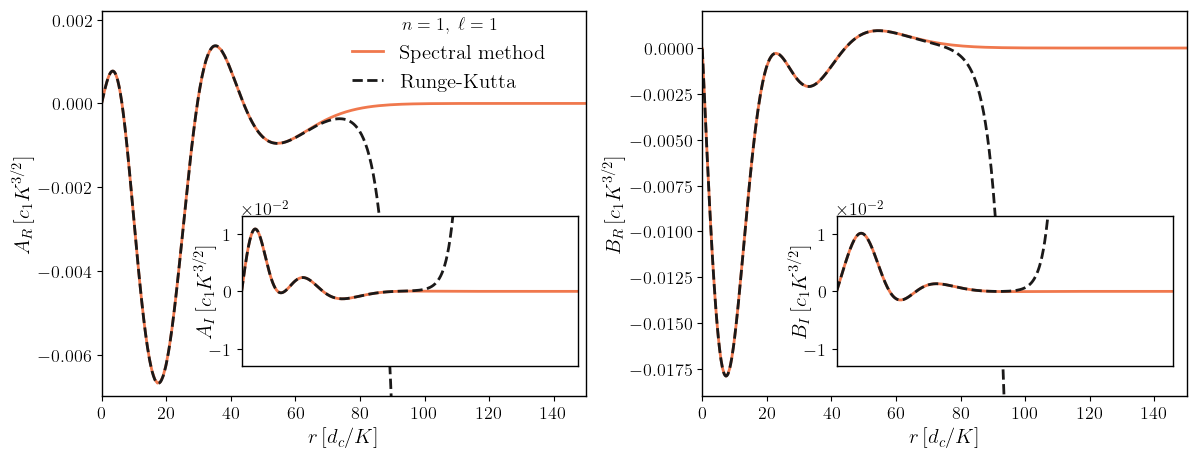

In [20]:
datA = [A1/rad, A2/rad, A3/rad, A4/rad]
datB = [B1/rad, B2/rad, B3/rad, B4/rad]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0., wspace=.24) # espacio vertical y horizontal entre los subplots
                      ) 

ax[0].plot(rad, np.real(datA[2]), '-', color = '#f0784d',
               label = r'Spectral method ')  

ax[0].plot(sol_.t, np.real(sol_.y[4])*sol_.t**(ell), '--', color = '#1a1919',
               label = r'Runge-Kutta')

    
ax[1].plot(rad, np.real(datB[2]), '-', color = '#f0784d',
               label = r'Spectral method ')
ax[1].plot(sol_.t, np.real(sol_.y[2])*sol_.t**(ell), '--', color = '#1a1919',
               label = r'Runge-Kutta')
    
    
ax[0].set_xlabel(r'$r\,[d_c/K]$')
ax[0].set_ylabel(r'$A_R \, [c_1 K^{3/2}]$')
ax[1].set_xlabel(r'$r\,[d_c/K]$')
ax[1].set_ylabel(r'$B_R \, [c_1 K^{3/2}]$')

ax[0].set_xlim(0, 150)
ax[0].set_ylim(-0.007, 0.0022)

ax[1].set_xlim(0, 150)
ax[1].set_ylim(-0.019, 0.002)


# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.225, 0.17, 0.24, 0.3]  # posición y dimensiones del insert
ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax1.ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))

ax1.plot(rad, np.imag(datA[2]), '-', color = '#f0784d',
               label = r'  $\lambda= {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[2]))
ax1.plot(sol_.t, np.imag(sol_.y[4])*sol_.t**(ell), '--', color = '#1a1919',
               label = r'Autovector $A_I$')

# límites
ax1.set_xlim(0, 150)
ax1.set_ylim(-1.3e-2, 1.3e-2)

ax1.set_ylabel(r'$A_I \, [c_1 K^{3/2}]$', labelpad=-5)
ax1.set_xticks([]);


# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.65, 0.17, 0.24, 0.3]  # posición y dimensiones del insert
ax2 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))

ax2.plot(rad, np.imag(datB[2]), '-', color = '#f0784d',
               label = r'$\lambda= {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[2]))
ax2.plot(sol_.t, np.imag(sol_.y[2])*sol_.t**(ell), '--', color = '#1a1919',
               label = r'Runge-Kutta')
# límites
ax2.set_xlim(0, 150)
ax2.set_ylim(-1.3e-2, 1.3e-2)

ax2.set_ylabel(r'$B_I \, [c_1 K^{3/2}]$', labelpad=-5)
ax2.set_xticks([]);

ax[0].legend(loc=(0.5, 0.77), frameon=False, ncols=1, title=r'$n=1, \; \ell=1$')


/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3216116915.py:1: RuntimeWarning: invalid value encountered in divide
  datA = [A1/rad, A2/rad, A3/rad, A4/rad]
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3216116915.py:2: RuntimeWarning: invalid value encountered in divide
  datB = [B1/rad, B2/rad, B3/rad, B4/rad]
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3216116915.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3216116915.py:36: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_17011/3216116915.py:55: UserWarning: cmr10 font should ideally be u

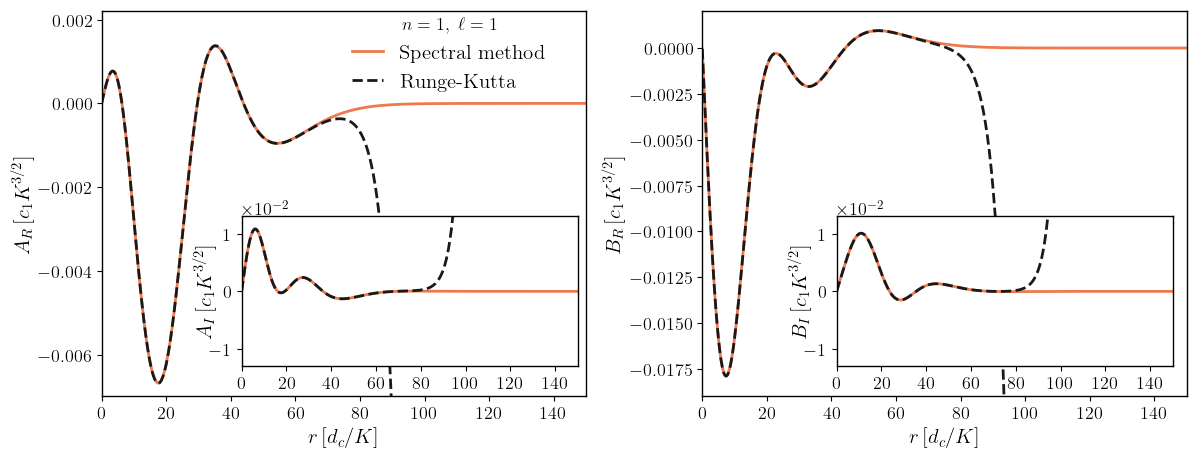

In [22]:
datA = [A1/rad, A2/rad, A3/rad, A4/rad]
datB = [B1/rad, B2/rad, B3/rad, B4/rad]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0., wspace=.24) # espacio vertical y horizontal entre los subplots
                      ) 

ax[0].plot(rad, np.real(datA[2]), '-', color = '#f0784d',
               label = r'Spectral method ')  

ax[0].plot(sol_.t, np.real(sol_.y[4])*sol_.t**(ell), '--', color = '#1a1919',
               label = r'Runge-Kutta')

    
ax[1].plot(rad, np.real(datB[2]), '-', color = '#f0784d',
               label = r'Spectral method ')
ax[1].plot(sol_.t, np.real(sol_.y[2])*sol_.t**(ell), '--', color = '#1a1919',
               label = r'Runge-Kutta')
    
    
ax[0].set_xlabel(r'$r\,[d_c/K]$')
ax[0].set_ylabel(r'$A_R \, [c_1 K^{3/2}]$')
ax[1].set_xlabel(r'$r\,[d_c/K]$')
ax[1].set_ylabel(r'$B_R \, [c_1 K^{3/2}]$')

ax[0].set_xlim(0, 150)
ax[0].set_ylim(-0.007, 0.0022)

ax[1].set_xlim(0, 150)
ax[1].set_ylim(-0.019, 0.002)


# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.225, 0.17, 0.24, 0.3]  # posición y dimensiones del insert
ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax1.ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))

ax1.plot(rad, np.imag(datA[2]), '-', color = '#f0784d',
               label = r'  $\lambda= {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[2]))
ax1.plot(sol_.t, np.imag(sol_.y[4])*sol_.t**(ell), '--', color = '#1a1919',
               label = r'Autovector $A_I$')

# límites
ax1.set_xlim(0, 150)
ax1.set_ylim(-1.3e-2, 1.3e-2)

ax1.set_ylabel(r'$A_I \, [c_1 K^{3/2}]$', labelpad=-5)
ax1.set_xticks([0, 20, 40, 60, 80, 100, 120, 140]);


# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.65, 0.17, 0.24, 0.3]  # posición y dimensiones del insert
ax2 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))

ax2.plot(rad, np.imag(datB[2]), '-', color = '#f0784d',
               label = r'$\lambda= {0.real:7.5f} + {0.imag:7.5f}i$'.format(lisautoval[2]))
ax2.plot(sol_.t, np.imag(sol_.y[2])*sol_.t**(ell), '--', color = '#1a1919',
               label = r'Runge-Kutta')
# límites
ax2.set_xlim(0, 150)
ax2.set_ylim(-1.3e-2, 1.3e-2)

ax2.set_ylabel(r'$B_I \, [c_1 K^{3/2}]$', labelpad=-5)
ax2.set_xticks([0, 20, 40, 60, 80, 100, 120, 140]);

ax[0].legend(loc=(0.5, 0.77), frameon=False, ncols=1, title=r'$n=1, \; \ell=1$')


/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_19242/2665448557.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14.5, 4.5),


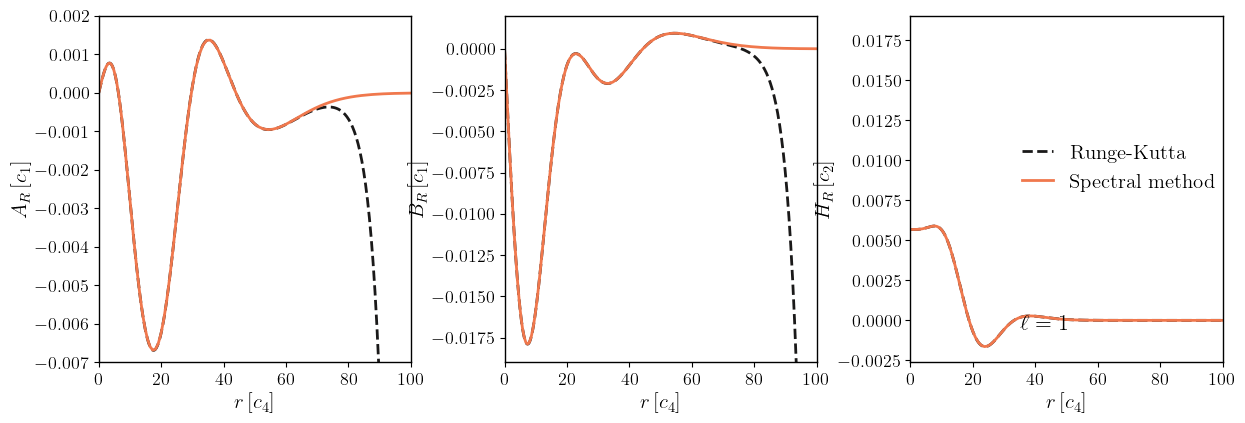

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14.5, 4.5),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.3) # espacio vertical y horizontal entre los subplots
                      ) 

ax[0].plot(sol_.t, np.real(sol_.y[4])*sol_.t**(ell), '--', color = '#1a1919',
               label = r'Autovector $A_R$')
ax[0].plot(rad, np.real(datA[i]), '-', color = '#f0784d',
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lam))


ax[1].plot(sol_.t, np.real(sol_.y[2])*sol_.t**(ell), '--', color = '#1a1919',
               label = r'Autovector $B_R$')
ax[1].plot(rad, np.real(datB[i]), '-', color = '#f0784d',
               label = r'Autovalor: {0.real:7.5f} + {0.imag:7.5f}i'.format(lam))


ax[2].plot(sol_.t, np.real(sol_.y[0]), '--', color = '#1a1919', 
               label = r'Runge-Kutta')
ax[2].plot(x_cod2, np.real(dath)/x_cod2, '-', color = '#f0784d',
                label = r'Spectral method')



ax[0].set_xlabel(r'$r \, [c_4]$')
ax[0].set_ylabel(r'$A_R \, [c_1]$')

ax[1].set_xlabel(r'$r \, [c_4]$')
ax[1].set_ylabel(r'$B_R \, [c_1]$')

ax[2].set_xlabel(r'$r \, [c_4]$')
ax[2].set_ylabel(r'$H_R \, [c_2]$')

#ax[0].ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))
#ax[1].ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))
#ax[2].ticklabel_format(axis='y', style='sci', scilimits=(-2,-2))


ax[0].set_xlim([0, 100])
ax[0].set_ylim(-0.007, 0.002)

ax[1].set_xlim([0, 100])
ax[1].set_ylim(-0.019, 0.002)

ax[2].set_xlim(0, 100)
#ax[2].set_ylim(-0.006, 0.001)


ax[2].text(x=35, y=-0.06e-02, s=r'$\ell=1$')
#ax[2].text(x=35, y=-0.12e-02, s=r'one-node')

ax[2].legend(loc=(0.33, 0.47), frameon=False)



In [23]:
fig.savefig('Check.eps', format='eps', #metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

## Modo trivial

In [3]:
# Resolución de ecuaciones del fondo
nodos, ell = 1, 1 #1,1

en, lam, nv, rD, sD, dsD, uD, duD, cer0, ell = ru.profiles(nodos, ell)  # no escalada

# extendiendo soluciones
Ext = 100 #7000
Np = 80 # 4800

rDnew, sDnew, dsDnew, uDnew, duDnew = ru.extend(ell, rD, sD, dsD, uD, duD, Ext, Np)

# normalizando

# reescalando
xN = rDnew/lam
sN = (rDnew**ell*sDnew)*lam**2
dsN = rDnew**(ell-1)*(ell*sDnew+rDnew*dsDnew)*lam**3
uN = uDnew*lam**2
duN = duDnew*lam**3

# interpolación de los datos
fsN = interp1d(xN, sN, kind='quadratic') # quadratic
fdsN = interp1d(xN, dsN, kind='linear')
fuN = interp1d(xN, uN, kind='quadratic')
fduN = interp1d(xN, duN, kind='quadratic')

# checking
Nf = lambda x: x**2*fsN(x)**2/(2*ell+1)
Nv = quad(Nf, xN[0], xN[-1])[0]

Bv = quad(Nf, xN[0], xN[-1])[0]
enA = 2*uN[-1]
print(r'Checking normalización,', Nv, 1)
print(r'Checking convergencia de la Energía U(inf), U(asint)', enA, en)

Finding a profile with  1 nodes
Maxima precisión alcanzada 0.33783151192188826 radio 32.99436221518425
masa  -10.714976632789813 Uf  -0.3247517428252849

E(U(inf))  -0.053727409224277295
energía =  -0.1583693272407303 $\lambda = $ 0.27998193449879394

Checking normalización,  1.0000000000706648 1
checking  -1.0101388079394344 10.714977040823765 0.296461078084562 -0.1583693272407303
Checking normalización, 0.9999999994951223 1
Checking convergencia de la Energía U(inf), U(asint) -0.1457380278456875 -0.1583693272407303


In [4]:
L = 200*(nodos+1)
N = int(L*3/4)
print(L, N)

lEnigF1, _, VF1, x1 = ru.espectro(L, N, fsN, fuN, ell) # , V1

# creando dataframe
jj = np.real(lEnigF1)!=0
autovec = VF1[:, jj]
autoval = lEnigF1[jj]

print(autoval)

400 300
Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  

In [ ]:
[-0.00619398-0.03340186j -0.00619398+0.03340186j  0.00619398+0.03340186j
  0.00619398-0.03340186j]

In [64]:
ind=np.abs(np.imag(lEnigF1))==2.8519331653053593e-06
lEnigF1[ind]

#2.8519331653053593e-06, 2.851944887573448e-06

array([0.-2.85193317e-06j])

In [78]:
L = 200*(nodos+1)
N = 90 # 80  # 50
print(L, N)

lEnigF1, _, VF1, x1 = ru.espectro(L, N, fsN, fuN, ell) # , V1

# creando dataframe
jj = np.real(lEnigF1)!=0
autovec = VF1[:, jj]
autoval = lEnigF1[jj]

print(autoval)

400 90
Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[-0.00619398-0.03340186j -0.00619398+0.03340186j  0.00619398+0.03340186j
  0.00619398-0.03340186j]


In [77]:
# set(np.abs(np.imag(lEnigF1)))

In [ ]:
[-0.00618695+3.34035663e-02j -0.00618695-3.34035663e-02j
 -0.00024748+3.92985187e-15j  0.00024748+3.92985187e-15j
  0.00618695-3.34035663e-02j  0.00618695+3.34035663e-02j]

[-6.19398143e-03+3.34018564e-02j -6.19398143e-03-3.34018564e-02j
 -9.64742012e-07+6.89100004e-15j  9.64742012e-07+6.89100004e-15j
  6.19398143e-03-3.34018564e-02j  6.19398143e-03+3.34018564e-02j]

[-0.00619398-0.03340186j -0.00619398+0.03340186j  0.00619398+0.03340186j
  0.00619398-0.03340186j]

In [5]:
L = 200*(nodos+1)
N1 = 50 # 80  # 50
print(L, N1)

lEnigF1, _, VF1, x1 = ru.espectro(L, N1, fsN, fuN, ell) # , V1

L = 200*(nodos+1)
N2 = 80 # 80  # 50
print(L, N2)

lEnigF2, _, VF2, x2 = ru.espectro(L, N2, fsN, fuN, ell) # , V1


400 50
Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
400 80
Comprobando reescalamiento  True True
Comprobando la inversa de D2  True
Comprobando que se cumple Ax=Lx -> [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  

In [6]:
# N=50
jj = np.real(lEnigF1)!=0
autovec1 = VF1[:, jj]
autoval1 = lEnigF1[jj]


# N=80
jj = np.real(lEnigF2)!=0
autovec2 = VF2[:, jj]
autoval2 = lEnigF2[jj]

print(autoval1)
print('')
print(autoval2)

[-0.00618695+3.34035663e-02j -0.00618695-3.34035663e-02j
 -0.00024748+3.92985187e-15j  0.00024748+3.92985187e-15j
  0.00618695-3.34035663e-02j  0.00618695+3.34035663e-02j]

[-6.19398143e-03+3.34018564e-02j -6.19398143e-03-3.34018564e-02j
 -9.64742012e-07+6.89100004e-15j  9.64742012e-07+6.89100004e-15j
  6.19398143e-03-3.34018564e-02j  6.19398143e-03+3.34018564e-02j]


In [7]:
indic = [3]  #[0, 1, 4, 5]  # [0, 1, 2, 3] 
datAVec1 = []
datAVec2 = []
lisAVal1 = []
lisAVal2 = []
lisautoval1 = []
lisautoval2 = []
for ii in indic:
    Es1 = autovec1[:, ii]
    Es2 = autovec2[:, ii]
    
    A1, B1 = Es1[:(N1-1)], Es1[(N1-1):]
    A2, B2 = Es2[:(N2-1)], Es2[(N2-1):]
    
    A1 = np.insert(A1, [0, len(A1)], [0, 0], axis=None)
    B1 = np.insert(B1, [0, len(B1)], [0, 0], axis=None)
    
    A2 = np.insert(A2, [0, len(A2)], [0, 0], axis=None)
    B2 = np.insert(B2, [0, len(B2)], [0, 0], axis=None)
    
    
    datAVec1.append(A1)
    datAVec1.append(B1)
    
    datAVec2.append(A2)
    datAVec2.append(B2)
    
    lisAVal1.append('{0.real:7.5f} + {0.imag:7.5f}i'.format(autoval1[ii]))
    lisautoval1.append(autoval1[ii])
    
    lisAVal2.append('{0.real:7.5f} + {0.imag:7.5f}i'.format(autoval2[ii]))
    lisautoval2.append(autoval2[ii])

datAVec1 = np.array(datAVec1).T
datAVec2 = np.array(datAVec2).T

DatosVect1 = pd.DataFrame(datAVec1, index=pd.Index(x1, name='Chev. ptos.'),
            columns=pd.MultiIndex.from_product([lisAVal1,
                                                ['A', 'B']], names=['Autovalor:', 'Autovector:']))

DatosVect2 = pd.DataFrame(datAVec2, index=pd.Index(x2, name='Chev. ptos.'),
            columns=pd.MultiIndex.from_product([lisAVal2,
                                                ['A', 'B']], names=['Autovalor:', 'Autovector:']))

# Asignando auto-vectores
def conv(elem):
    """ 
    """
    idx = pd.IndexSlice
    A = np.array(elem.loc[:, idx[:,'A']]).T[0]
    B = np.array(elem.loc[:,idx[:,'B']]).T[0]
    return A, B

# separando
nLam = 1 # 2
datos1 = [DatosVect1[[lisAVal1[i]]] for i in range(nLam)]
datos2 = [DatosVect2[[lisAVal2[i]]] for i in range(nLam)]


A1, B1 = np.array(list(map(conv, datos1)))[0]
A2, B2 = np.array(list(map(conv, datos2)))[0]


# pasando a distancias reales
rad1 = np.array([(-x1[i]+1)*L/2. for i in range(N1+1)])
rad2 = np.array([(-x2[i]+1)*L/2. for i in range(N2+1)])

dat1 = [A1/rad1, B1/rad1]
dat2 = [A2/rad2, B2/rad2]

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_5639/149810493.py:68: RuntimeWarning: invalid value encountered in divide
  dat1 = [A1/rad1, B1/rad1]
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_5639/149810493.py:69: RuntimeWarning: invalid value encountered in divide
  dat2 = [A2/rad2, B2/rad2]


/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_5639/4046951664.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_5639/4046951664.py:23: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2


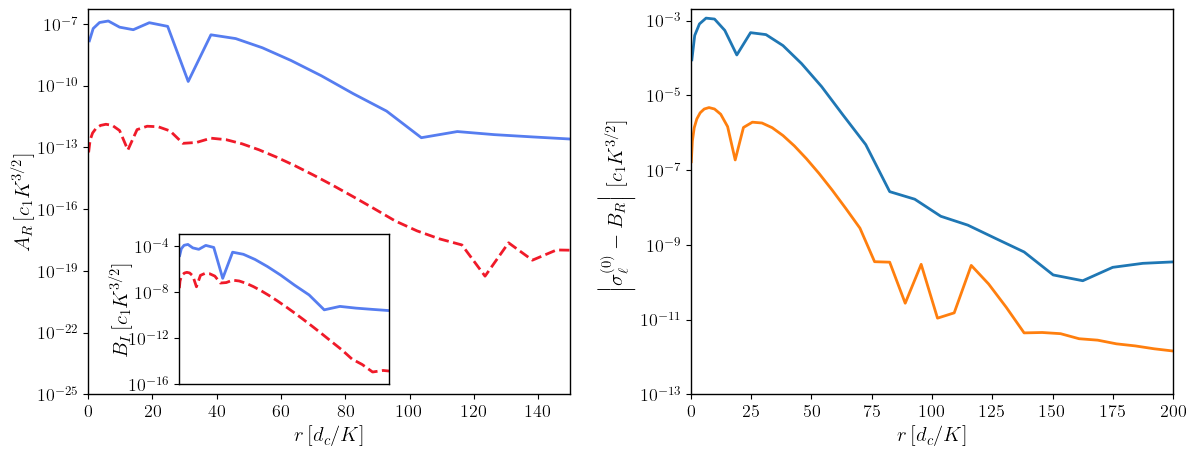

In [104]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0., wspace=.25) # espacio vertical y horizontal entre los subplots
                      )

# por la normalización
fac1 = np.max(sN)/np.max(np.real(dat1[1][1:]))
fac2 = np.max(sN)/np.max(np.real(dat2[1][1:]))

ax[0].plot(rad1, np.abs(np.real(dat1[0]))*fac1, color='#567df0', label=r'$N=100, r_\star=150$')
ax[0].plot(rad2, np.abs(np.real(dat2[0]))*fac2, ls='--', color='#f01a29', label=r'$N=120, r_\star=150$')

ax[0].set_xlim(0, 150)
ax[0].set_ylim(1e-25, 5e-7)

ax[0].set_yscale('log')

ax[0].set_ylabel(r'$A_R  \, [c_1 K^{3/2}]$')
ax[0].set_xlabel(r'$r\,[d_c/K]$')

# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.19, 0.13, 0.15, 0.3]  # posición y dimensiones del insert
ax1 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
ax1.ticklabel_format(axis='y', style='sci', scilimits=(-6,-10))

ax1.plot(rad1, np.abs(np.imag(dat1[0])*fac1), color='#567df0', label=r'$B_R \, [c_1]$')
ax1.plot(rad2, np.abs(np.imag(dat2[0])*fac2), ls='--', color='#f01a29', label=r'$B_R \, [c_1]$')

ax1.set_xlim(0, 150)
#ax1.set_ylim(-0.002, 0.011)
ax1.set_ylabel(r'$B_I  \, [c_1 K^{3/2}]$', labelpad=-2)
ax1.set_yscale('log')

ax1.set_ylim(1e-16, 1e-3)
ax1.set_xticks([]);

#ax[1].plot(rad1, np.real(dat1[1])*fac1, color='#567df0')
#ax[1].plot(rad2, np.real(dat2[1])*fac2, ls='--', color='#f01a29')

ax[1].plot(rad1, np.abs(fsN(rad1)-np.real(dat1[1])*fac1))
ax[1].plot(rad2, np.abs(fsN(rad2)-np.real(dat2[1])*fac2))

#ax[1].plot(xN[::7], sN[::7], ls=' ', marker='o', color='#f59607', markersize=4, mfc='white',
#           label=r'$\sigma^{(0)}_{\ell}\,[c_1]$')


ax[1].set_xlim(0, 200)
ax[1].set_ylim(1e-13, 2e-3)
ax[1].set_yscale('log')

ax[1].set_xlabel(r'$r\,[d_c/K]$')
ax[1].set_ylabel(r'$\left|\sigma^{(0)}_{\ell}-B_R\right| \, [c_1 K^{3/2}]$')


# añadiendo figuras insertadas, en este caso los términos métricos
left, bottom, width, height = [0.73, 0.15, 0.15, 0.3]  # posición y dimensiones del insert
#ax2 = fig.add_axes([left, bottom, width, height]) # añadiendo el subplot y llamandolo ax2
# en caso de que quieras que los ejes usen notacion científica descomentar
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(-6,-6))

#ax2.plot(rad, np.imag(datA[1])*1.23, color='#567df0', label=r'$B_I \, [c_1]$')
#ax2.plot(rad2, np.imag(datA2[1])*1.23, ls='--', color='#f01a29', label=r'$B_I \, [c_1]$')


#ax2.set_xlim(0, 145)
#ax1.set_ylim(-0.002, 0.011)
ax2.set_ylabel(r'$A_I \, [c_1 K^{3/2}]$', labelpad=-5)
ax2.set_xticks([]);

#ax[0].legend(loc='lower right', frameon=False)
#ax[1].legend(loc='best', frameon=False)

#ax[0].text(x=25, y=1.65e-02, s=r'$\ell=1$')
#ax[0].text(x=25, y=1.45e-02, s=r'two-nodes')
# ax[0].text(x=50, y=-0.5e-02, s=r'$\lambda=4.09\times10^{-6}+1.83\times10^{-13}\,i$')


In [61]:
fig.savefig('ZeroN.eps', format='eps', #metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        #bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )